In [147]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from collections import Counter
import xlsxwriter
import thinkstats2
import matplotlib.pyplot as plt

In [44]:
# Create scaffold spreadsheet with Filtered Community Composition
# Make data frames for every sheet
xls = pd.ExcelFile('C:/Users/coverney/Desktop/Research/Meta/Data/Filtered community comparison.xlsx')
sample_names = ['FCR15b', 'FCFTC3', 'SCH14c', 'SCB14c', 'FCX16c', 
                'FCS17a', 'FCW18b', 'SCQ17a', 'SCR11c', 'FCP16c', 'SCD17c']
dfs = []
for index, name in enumerate(sample_names):
    temp_df = pd.read_excel(xls, sample_names[index])
    dfs.append(temp_df)

In [3]:
# Read in BLAST results
blast_scaffolds = pd.read_excel('C:/Users/coverney/Desktop/Research/Meta/Data/remaining_gene_sequences2.xlsx')
blast_scaffolds.head()

,scaffold id,num_seqs,seq1,seq2,seq3,seq4,seq5,phyla
0,Ga0136458_100019,5,MLSKKAKYALQACLSLAGEAPGQPILIASLAERDGIPKKFLEIILL...,VIFDMDGTLLDTESIGIRAWVAAFAAHGVTIDRETAILPIGCDHVR...,MPSLAPIPSLRSRIAAFAFGLFAVDSMAIKVDSVLNQYSLYGTDRT...,MQRYAETHYKFRLPWSPLFRPLPEMIVDAPWCAVPGQDVPLFLAVH...,MSQQPLDLAKELDLALSLVKAAEAPILSRFQKKIEVVKKRDNTPVT...,Unclassified
1,Ga0136458_100020,5,MTFLRTLALCLVATSAMARDALRTDSTRTGRASFYHARSGQGTCTL...,MPKRTDIHSILIIGSGPIVIGQACEFDYSGTQACKALREEGYRVIL...,VIGALFSVCVFAAPLWAQEKPLSILTEEWAPYNYTENGVVVGFSVE...,MGCFVASQDDVGQKMTVEIWSDLICPWCSIGLARFDKALAAFPHKE...,MPTYPPSTRPAPLEFSTFLRRERVVIALLAATFVLLAWQHWGMKRS...,Proteobacteria
2,Ga0136458_100030,5,MKTKLLYLCTGNSCRSQMAEAWTRQLKGDLYEVYSAGIEAHGLNPN...,MAKYENNAALEELAEVASALGEPKRLHALGLLSHGELCLCDLTEAL...,MSGSPRAPRASRRRIFAKAAVWAAVAFGFATSASAWSVTGTVKNAS...,MRPVFEYLDYRDILKEAYEERKVSSPLFSYRMLAEFLGLDTSNVFR...,MPDLFTYLEYRDYLKDAYEERRQLHAYFSYRFIGNKVGMDSSYLTR...,Unclassified
3,Ga0136458_100035,5,ELKKMLDKVLDGLLTEREAKVLRMYYGINYSKEFTFDEIGRELRLT...,MLILRWLASQALKAREILSILVICIFCLWISNSSEDSQKVWRNAFA...,MAAEKNAPEKFVFYMHRMCKEYTNNKVVLNNISLSFYYGAKIGIIG...,VSFPTSFLNSIGTVPAGLLVLATTCFLGKMAGSVKWAGVKLGGAGV...,MRLLATATALPKSTESAEEIARAIGKSPAWVSDRTGVVRRSRATKE...,Fibrobacteres
4,Ga0136458_100037,5,VFTRLAHVCLNVKNLDRSIAYYRKLGFEPRFEFTRKGGRFGAYLEI...,MYRKLSALATAVAWSASIAVAGNPLDIHGRLQAKGNRIVGETSGDT...,MQTIRELLDDPRLFPSLRRIVPSRPRLDVAGLDGAAPAVSIAMRHL...,VIKPELLAPAGGWDCAKAAIENGADAIYFGSEVFNARMRADNFTLA...,LSSSKPEGDTRKKWGNFGEERAASLLRARGLDVIDRNWRHGRGELD...,Proteobacteria


In [45]:
# Go through Filtered Community Composition and write in 
# phylum using blast_scaffolds
# This automatically changes the dfs which is why there are warnings
for df in dfs:
#for df in dfs[1:2]:
    df_scaffold_id = df['Scaffold ID']
    df_phyla = df['Lineage Phylum']
    for index, scaffold_id in enumerate(df_scaffold_id):
        # Clean up scaffold_id
        if scaffold_id is not np.nan:
            sep = scaffold_id.find('Ga')
            if sep == -1:
                print('There is no Ga in this scaffold: ', scaffold_id, '\n')
            else:
                clean_scaffold_id = scaffold_id[sep:]
                try:
                    phylum = blast_scaffolds.loc[clean_scaffold_id]['phyla']
                    if df_phyla[index] is not np.nan:
                        print('Scaffold {} has already been identified. Compare {} with {}.\n'.format(clean_scaffold_id, df_phyla[index], phylum))
                    else:
                        df['Lineage Phylum'][index] = phylum
                        df['Scaffold ID'][index] = '*'+scaffold_id
                except:
                    continue
        else:
            continue

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaffold ID 

There is no Ga in this scaffold:  Scaf

In [50]:
# Write the new data to another Excel file
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:/Users/coverney/Desktop/Research/Meta/Data/Filtered community comparison2.xlsx', engine='xlsxwriter')
# Write each dataframe to a different worksheet.
for index, df in enumerate(dfs):
    df.to_excel(writer, sheet_name=sample_names[index], index=False)
    
# Close the Pandas Excel writer and output the Excel file.
writer.save()    

In [51]:
# Now read in Filtered community comparison2
xls2 = pd.ExcelFile('C:/Users/coverney/Desktop/Research/Meta/Data/Filtered community comparison2.xlsx')
dfs2 = []
for index, name in enumerate(sample_names):
    temp_df = pd.read_excel(xls2, sample_names[index])
    dfs2.append(temp_df)

In [65]:
def update_dict(dictionary, phylum):
    if phylum not in dictionary.keys():
        dictionary[phylum] = 1
    else:
        dictionary[phylum] += 1
    return dictionary

In [93]:
def merge_dicts(big_dict, small_dict):
    for key, value in small_dict.items():
        if key != 'Name':
            if key not in big_dict.keys():
                big_dict[key] = value
            else:
                big_dict[key] = big_dict[key] + value
        else:
            continue
    return big_dict

In [66]:
phyla_counts = pd.DataFrame()

In [94]:
# Go through every df and generate dictionary from phylym col
# Keep track of pfams
phyla_counts = pd.DataFrame()
nitrogenase_pfams = ['NifH', 'Anf_VnfG', 'AnfO']
sc_ghs = {'Name':'sc_gh'}
sc_nitro = {'Name':'sc_nitro'}
fc_ghs = {'Name':'fc_gh'}
fc_nitro = {'Name':'fc_nitro'}
for index, df in enumerate(dfs2):
#for index, df in enumerate(dfs2[0:1]):
    current_pfam = 'GH1'
    df_pfams = df['GH1']
    df_phyla = df['Lineage Phylum']
    all_pfams = {}
    gh9 = {}
    ghs = {}
    nitro = {}
    sc = 1
    sample_name = sample_names[index]
    if sample_name[:2].lower() != 'sc':
        sc = 0
    all_pfams['Name'] = sample_name + '_all'
    ghs['Name'] = sample_name + '_gh'
    gh9['Name'] = sample_name + '_gh9'
    nitro['Name'] = sample_name + '_nitro'
    for index2, pfam in enumerate(df_pfams):
        if pfam is not np.nan:
            current_pfam = pfam
        phylum = df_phyla[index2]
        if phylum is not np.nan and phylum != 'Lineage Phylum':
            phylum = phylum.lower()
            # Check which dicts to update using current pfam
            all_pfams = update_dict(all_pfams, phylum)
            if 'GH' in current_pfam:
                ghs = update_dict(ghs, phylum)
                if current_pfam == 'GH9':
                    gh9 = update_dict(gh9, phylum)
            elif current_pfam in nitrogenase_pfams:
                nitro = update_dict(nitro, phylum)
            else:
                print("Nothing matches with pfam: ", current_pfam)
        else:
            continue
    phyla_counts = phyla_counts.append(all_pfams, ignore_index=True)
    phyla_counts = phyla_counts.append(ghs, ignore_index=True)
    phyla_counts = phyla_counts.append(gh9, ignore_index=True)
    phyla_counts = phyla_counts.append(nitro, ignore_index=True)
    # Update fc and sc dicts
    if sc == 1:
        sc_ghs = merge_dicts(sc_ghs, ghs)
        sc_nitro = merge_dicts(sc_nitro, nitro)
    else:
        fc_ghs = merge_dicts(fc_ghs, ghs)
        fc_nitro = merge_dicts(fc_nitro, nitro)
# Append stuff for freshwater and saltwater
phyla_counts = phyla_counts.append(sc_ghs, ignore_index=True)
phyla_counts = phyla_counts.append(sc_nitro, ignore_index=True)
phyla_counts = phyla_counts.append(fc_ghs, ignore_index=True)
phyla_counts = phyla_counts.append(fc_nitro, ignore_index=True)

In [95]:
phyla_counts.tail()

,Name,acidobacteria,armatimonadetes,bacteroidetes,cyanobacteria,fibrobacteres,firmicutes,latescibacteria,proteobacteria,spirochaetes,...,deinococcus-thermus,ignavibacteriae,chlorobi,deferribacteres,thermotogae,brc1,euryarchaeota,crenarchaeota,planctomycetes,candidatus margulisbacteria
43,SCD17c_nitro,NaN,NaN,6.0,NaN,1.0,NaN,NaN,22.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,sc_gh,4.0,NaN,363.0,6.0,18.0,89.0,NaN,216.0,54.0,...,NaN,1.0,5.0,2.0,1.0,NaN,NaN,1.0,2.0,NaN
45,sc_nitro,NaN,NaN,21.0,NaN,1.0,8.0,NaN,80.0,3.0,...,NaN,NaN,9.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
46,fc_gh,5.0,6.0,345.0,2.0,29.0,61.0,1.0,233.0,20.0,...,1.0,5.0,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN
47,fc_nitro,NaN,NaN,12.0,NaN,NaN,1.0,NaN,179.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [97]:
phyla_counts.to_excel("C:/Users/coverney/Desktop/Research/Meta/Data/phyla_counts.xlsx", index=False)

In [114]:
# Read in phyla_counts 
phyla_counts = pd.read_excel('C:/Users/coverney/Desktop/Research/Meta/Data/phyla_counts.xlsx')
phyla_counts.head()

,Name,acidobacteria,armatimonadetes,bacteroidetes,cyanobacteria,fibrobacteres,firmicutes,latescibacteria,proteobacteria,spirochaetes,...,deinococcus-thermus,ignavibacteriae,chlorobi,deferribacteres,thermotogae,brc1,euryarchaeota,crenarchaeota,planctomycetes,candidatus margulisbacteria
0,FCR15b_all,1.0,1.0,54,1.0,5.0,4.0,1.0,44,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FCR15b_gh,1.0,1.0,53,1.0,5.0,4.0,1.0,25,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FCR15b_gh9,NaN,NaN,7,NaN,2.0,1.0,NaN,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FCR15b_nitro,NaN,NaN,1,NaN,NaN,NaN,NaN,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FCFTC3_all,1.0,2.0,50,NaN,2.0,3.0,NaN,69,1.0,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
phyla_counts = phyla_counts.set_index('Name')
phyla_counts = phyla_counts.fillna(0)

In [116]:
# Find the frequencies (PMF each row)
for name in phyla_counts.index.values[0:1]:
    row = phyla_counts.loc[name]
    row_pmf = thinkstats2.Pmf(row)
    print(row_pmf.Items())

dict_items([(0.0, 0.5217391304347826), (1.0, 0.21739130434782608), (14.0, 0.043478260869565216), (2.0, 0.043478260869565216), (44.0, 0.043478260869565216), (4.0, 0.043478260869565216), (5.0, 0.043478260869565216), (54.0, 0.043478260869565216)])


In [124]:
# Other thing: update the Gh9 and Nitrogenase Figures
df_gh9 = pd.DataFrame()
df_nitro = pd.DataFrame()
for name in phyla_counts.index.values:
    row = phyla_counts.loc[name]
    if 'gh9' in name:
        ind = name.find('_gh9')
        df_gh9 = df_gh9.append(row, ignore_index=True)
    elif 'nitro' in name and 'sc' not in name and 'fc' not in name:
        ind = name.find('_nitro')
        df_nitro = df_nitro.append(row, ignore_index=True)
    else:
        continue

In [127]:
df_gh9 = df_gh9.set_index([pd.Series(sample_names)])
df_nitro = df_nitro.set_index([pd.Series(sample_names)])

In [128]:
df_gh9.to_excel("C:/Users/coverney/Desktop/Research/Meta/Data/gh9.xlsx", index=True)
df_nitro.to_excel("C:/Users/coverney/Desktop/Research/Meta/Data/nitro.xlsx", index=True)

In [140]:
# Make the double bar graphs
# Read in filtered data
phyla_data_gh = pd.read_excel('C:/Users/coverney/Desktop/Research/Meta/Data/phyla_counts_figure_gh.xlsx')
phyla_data_gh.head()

,Name,acidobacteria,armatimonadetes,bacteroidetes,cyanobacteria,fibrobacteres,firmicutes,proteobacteria,spirochaetes,unclassified,verrucomicrobia,actinobacteria,chloroflexi,ignavibacteriae,chlorobi,deferribacteres
0,sc_gh,4,NaN,363,6,18,89,216,54,44,17,3,2,1,5.0,2.0
1,fc_gh,5,6.0,345,2,29,61,233,20,71,69,31,4,5,NaN,NaN


In [141]:
phyla_data_nitro = pd.read_excel('C:/Users/coverney/Desktop/Research/Meta/Data/phyla_counts_figure_nitro.xlsx')
phyla_data_nitro.head()

,Name,bacteroidetes,fibrobacteres,firmicutes,proteobacteria,spirochaetes,unclassified,verrucomicrobia,chloroflexi,chlorobi,deferribacteres
0,sc_nitro,21,1.0,8,80,3,5,4,9.0,9.0,15.0
1,fc_nitro,12,NaN,1,179,2,3,9,NaN,NaN,NaN


In [142]:
phyla_data_gh = phyla_data_gh.set_index('Name')
phyla_data_nitro = phyla_data_nitro.set_index('Name')

In [143]:
phyla_data_gh = phyla_data_gh.fillna(0)
phyla_data_nitro = phyla_data_nitro.fillna(0)

In [151]:
gh_x1 = phyla_data_gh.loc['sc_gh'] 
gh_x2 = phyla_data_gh.loc['fc_gh'] 
nitro_x1 = phyla_data_nitro.loc['sc_nitro']  
nitro_x2 = phyla_data_nitro.loc['fc_nitro'] 

# Create the bar labels
bar_labels_gh = [x.capitalize() for x in phyla_data_gh.columns.values]
bar_labels_nitro = [x.capitalize() for x in phyla_data_nitro.columns.values]

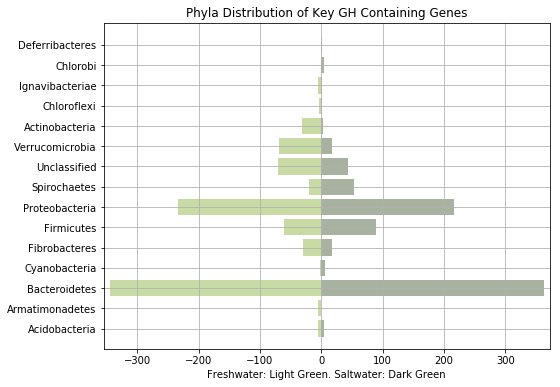

In [155]:
# Plot of GHs
# Create a figure
fig1 = plt.figure(figsize=(8,6))

# Set the y position
y_pos = np.arange(len(gh_x1))
y_pos = [x for x in y_pos]
plt.yticks(y_pos, bar_labels_gh, fontsize=10)

# Create a horizontal bar in the position y_pos
plt.barh(y_pos, 
         # using x1 data
         gh_x1, 
         # that is centered
         align='center', 
         # with alpha 0.4
         alpha=0.4, 
         # and color green
         color='#263F13')

# Create a horizontal bar in the position y_pos
plt.barh(y_pos, 
         # using NEGATIVE x2 data
         -gh_x2,
         # that is centered
         align='center', 
         # with alpha 0.4
         alpha=0.4, 
         # and color green
         color='#77A61D')

# annotation and labels
plt.xlabel('Freshwater: Light Green. Saltwater: Dark Green')
t = plt.title('Phyla Distribution of Key GH Containing Genes')
plt.ylim([-1,len(gh_x1)+0.1])
plt.xlim([-max(gh_x2)-10, max(gh_x1)+10])
plt.grid()

plt.show()

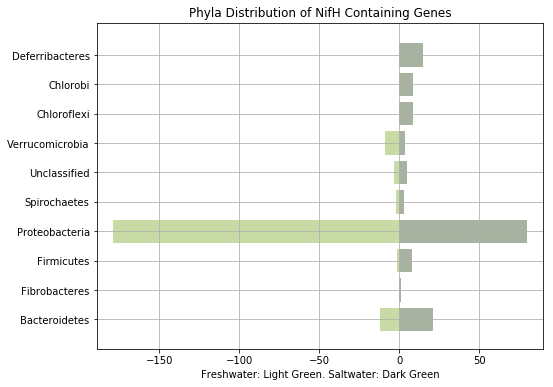

In [156]:
# Plot of Nitrogenase
# Create a figure
fig1 = plt.figure(figsize=(8,6))

# Set the y position
y_pos = np.arange(len(nitro_x1))
y_pos = [x for x in y_pos]
plt.yticks(y_pos, bar_labels_nitro, fontsize=10)

# Create a horizontal bar in the position y_pos
plt.barh(y_pos, 
         # using x1 data
         nitro_x1, 
         # that is centered
         align='center', 
         # with alpha 0.4
         alpha=0.4, 
         # and color green
         color='#263F13')

# Create a horizontal bar in the position y_pos
plt.barh(y_pos, 
         # using NEGATIVE x2 data
         -nitro_x2,
         # that is centered
         align='center', 
         # with alpha 0.4
         alpha=0.4, 
         # and color green
         color='#77A61D')

# annotation and labels
plt.xlabel('Freshwater: Light Green. Saltwater: Dark Green')
t = plt.title('Phyla Distribution of NifH Containing Genes')
plt.ylim([-1,len(nitro_x1)+0.1])
plt.xlim([-max(nitro_x2)-10, max(nitro_x1)+10])
plt.grid()

plt.show()